![](data/venn_ml.png)

![](data/types.png)

![](data/regresion.jpg)

![](data/linear.png)

![](data/unsu.png)

![](data/rein.png)

![](data/ext_sklearn.jpeg)

![](data/sklearn.png)

In [ ]:
#ETL (Extract Tranform Loading)

In [1]:
#REgresion estamos buscnado un numero el cual, estara explicado por una serie de variables que estaran multiplicadas
#por un parametro, que en su conjuto explicaran una variable inpendiente

In [ ]:
y = mx + b

y = β0 + β1x1

In [ ]:
#La sigfinicancia de nuestros variables estaran dadas por la probabildad de 't' bajo la premisa de que un p-value menor
#al valor alpha seran estadisticamente significativas

#En su conjunto se las variabales sonestadisticamente significativas el p value de f sera menor al alpha designado

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns



In [4]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


Text(0.5, 1.0, 'bateos y runs')

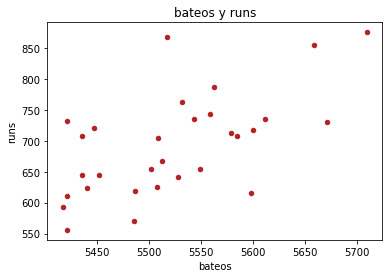

In [8]:
fig, ax  = plt.subplots(figsize = (6,4))

datos.plot(x = 'bateos', y = 'runs',c = 'firebrick', kind = 'scatter',ax = ax)

ax.set_title('bateos y runs')

In [10]:
datos

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762
5,New_S.,5600,718
6,New_Y.,5518,867
7,Milwaukee,5447,721
8,Colorado,5544,735
9,Houston,5598,615


In [11]:
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test)

Coeficiente de correlación de Pearson:  (0.6106270467206688, 0.0003388351359791963)


In [13]:
help(pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets.  The calculation of the p-value relies on the
    assumption that each dataset is normally distributed.  (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)  Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these da

In [15]:
X = datos[['bateos']]
y = datos[['runs']]
X.values.reshape(-1,1)

array([[5659],
       [5710],
       [5563],
       [5672],
       [5532],
       [5600],
       [5518],
       [5447],
       [5544],
       [5598],
       [5585],
       [5436],
       [5549],
       [5612],
       [5513],
       [5579],
       [5502],
       [5509],
       [5421],
       [5559],
       [5487],
       [5508],
       [5421],
       [5452],
       [5436],
       [5528],
       [5441],
       [5486],
       [5417],
       [5421]], dtype=int64)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1,1),
                                                   y.values.reshape(-1,1),
                                                   train_size = 0.8,
                                                   random_state = 1234,
                                                   shuffle = True)

In [65]:
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
modelo.intercept_ #el punto donde cruza en y como valor fijo

array([-2367.7028413])

In [67]:
print(X.columns, modelo.coef_)

Index(['bateos'], dtype='object') [[0.55287135]]


In [68]:
modelo.coef_.flatten() #los coef son la proporcion que multiplica a las varibales

array([0.55287135])

In [69]:
modelo.score(X,y) #R cuadrada, nos indica que tanto se esta explicando la vairable independiente

0.35861198994987437

In [70]:
modelo.score(X_train,y_train)

0.27130364535823914

In [71]:
predicciones = modelo.predict([[5435]])

In [72]:
predicciones

array([[637.15296469]])

In [73]:
predicciones = modelo.predict(X = X_test)

In [74]:
predicciones

array([[643.78742093],
       [720.0836677 ],
       [690.78148597],
       [789.19258689],
       [627.20128033],
       [697.41594221]])

In [75]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)

In [76]:
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Mon, 16 Nov 2020   Prob (F-statistic):            0.00906
Time:                        12:15:20   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

In [48]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
2,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
3,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088


In [60]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.001)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

predicciones

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,x,y
4,629.412766,23.713237,539.489073,719.336459,351.948416,906.877116,5421.0,610
17,629.412766,23.713237,539.489073,719.336459,351.948416,906.877116,5421.0,556
10,629.412766,23.713237,539.489073,719.336459,351.948416,906.877116,5421.0,731
5,637.705836,21.455690,556.343057,719.068615,362.896635,912.515037,5436.0,707
14,637.705836,21.455690,556.343057,719.068615,362.896635,912.515037,5436.0,644
9,640.470193,20.738565,561.826845,719.113541,366.453823,914.486563,5441.0,624
1,646.551778,19.237651,573.600092,719.503463,374.114366,918.989190,5452.0,645
8,665.349404,15.547549,606.391065,724.307742,396.321002,934.377805,5486.0,570
18,665.902275,15.467938,607.245835,724.558715,396.939874,934.864676,5487.0,619
12,674.195345,14.531876,619.088573,729.302118,405.984698,942.405993,5502.0,654


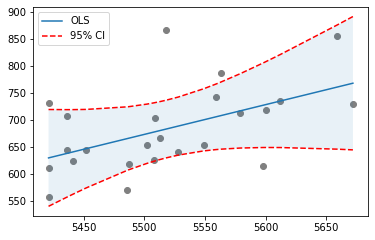

In [61]:
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [88]:
multi = pd.read_csv('data/multi.csv')
multi.head()

,Unnamed: 0,tv,radio,periodico,ventas
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9


In [90]:
multi.drop('Unnamed: 0', inplace = True, axis = 1)

In [91]:
multi.corr()

,tv,radio,periodico,ventas
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
periodico,0.056648,0.354104,1.000000,0.228299
ventas,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

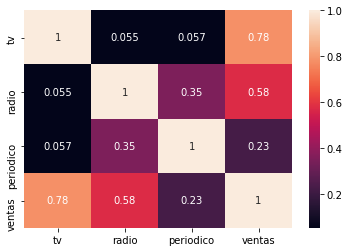

In [93]:
sns.heatmap(multi.corr(), annot  = True)

In [101]:
X = datos[['tv','radio','periodico']]

y = datos['ventas']



In [102]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     660.3
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           3.69e-77
Time:                        12:48:41   Log-Likelihood:                -308.36
No. Observations:                 160   AIC:                             622.7
Df Residuals:                     157   BIC:                             631.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9004      0.335      8.652      0.0

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [103]:
census = pd.read_csv('data/census.csv')

In [104]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [105]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
CensusId           3220 non-null int64
State              3220 non-null object
County             3220 non-null object
TotalPop           3220 non-null int64
Men                3220 non-null int64
Women              3220 non-null int64
Hispanic           3220 non-null float64
White              3220 non-null float64
Black              3220 non-null float64
Native             3220 non-null float64
Asian              3220 non-null float64
Pacific            3220 non-null float64
Citizen            3220 non-null int64
Income             3219 non-null float64
IncomeErr          3219 non-null float64
IncomePerCap       3220 non-null int64
IncomePerCapErr    3220 non-null int64
Poverty            3220 non-null float64
ChildPoverty       3219 non-null float64
Professional       3220 non-null float64
Service            3220 non-null float64
Office             3220 non-null float64
Constru

In [106]:
census['Poverty']

0       12.9
1       13.4
2       26.7
3       16.8
4       16.7
        ... 
3215    48.5
3216    39.1
3217    54.0
3218    52.3
3219    51.7
Name: Poverty, Length: 3220, dtype: float64

In [107]:
census['FamilyWork']

0       0.0
1       0.4
2       0.1
3       0.4
4       0.4
       ... 
3215    0.0
3216    0.3
3217    0.2
3218    0.0
3219    0.0
Name: FamilyWork, Length: 3220, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2570ea8ea88>,
 'caps': [<matplotlib.lines.Line2D at 0x2570e8744c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2570e917608>],
 'medians': [<matplotlib.lines.Line2D at 0x2570ee86208>],
 'fliers': [<matplotlib.lines.Line2D at 0x2570e725c48>],
 'means': []}

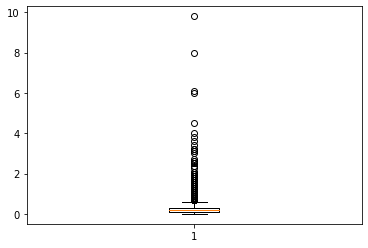

In [108]:
plt.boxplot(census['FamilyWork'])

In [109]:
import numpy as np

In [110]:
q_25 = np.quantile(census['FamilyWork'], 0.25)

In [111]:
q_25

0.1

In [112]:
q_75 = np.quantile(census['FamilyWork'], 0.75)

In [113]:
iqr = q_75-q_25

In [114]:
sup = q_75+(iqr*1.5)

In [115]:
low = q_25-(iqr*1.5)

In [117]:
df_clean= census[(census['FamilyWork'] > low) & (census['FamilyWork'] < sup)]

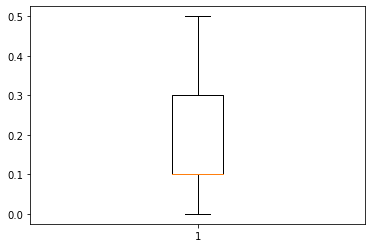

In [119]:
plt.boxplot(df_clean['FamilyWork']);

In [120]:
df_clean

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,...,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,...,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,...,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,...,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3


In [121]:
census

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,...,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,...,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,...,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,...,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3


In [122]:
census['HispanicRate'] = census['Hispanic'] / 100

In [125]:
def to_percent(x):
    return(x/100)

conversion_list = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'Employed', 'PrivateWork', 'PublicWork']

#we create a new list of columns. We prefer doing this since we'd rather keep the old data around just in case.

new_column_list = [x+'Rate' for x in conversion_list]
census[new_column_list] = census[conversion_list].apply(to_percent)




In [127]:
census.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'HispanicRate',
       'WhiteRate', 'BlackRate', 'NativeRate', 'AsianRate', 'PacificRate',
       'PovertyRate', 'ChildPovertyRate', 'ProfessionalRate', 'ServiceRate',
       'OfficeRate', 'ConstructionRate', 'ProductionRate', 'DriveRate',
       'CarpoolRate', 'TransitRate', 'WalkRate', 'OtherTranspRate',
       'WorkAtHomeRate', 'EmployedRate', 'PrivateWorkRate', 'PublicWorkRate'],
      dtype='object')

In [130]:
census['TotalPop'].values.reshape(-1,1)

array([[ 55221],
       [195121],
       [ 26932],
       ...,
       [ 24685],
       [ 36279],
       [ 39474]], dtype=int64)

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
norm = MinMaxScaler()

In [131]:
norm.fit_transform(census['TotalPop'].values.reshape(-1,1))

array([[0.00549256],
       [0.01942918],
       [0.00267446],
       ...,
       [0.00245061],
       [0.00360559],
       [0.00392387]])

In [134]:
census['Tot_pop_scaled'] = norm.fit_transform(census['TotalPop'].values.reshape(-1,1))

In [135]:
census['Tot_pop_scaled']

0       0.005493
1       0.019429
2       0.002674
3       0.002243
4       0.005741
          ...   
3215    0.005656
3216    0.000901
3217    0.002451
3218    0.003606
3219    0.003924
Name: Tot_pop_scaled, Length: 3220, dtype: float64

In [136]:
states = pd.get_dummies(census['State'], drop_first = True)

In [137]:
states

,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
